# Importing the Libraries and Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error,\
mean_squared_error, r2_score

# Data Collection and Processing

In [2]:
# Loading the Diabetes data from csv file and create Pandas DataFrame
diabetes_data = pd.read_csv('diabetes_dataset.csv')

In [3]:
# print 5 rows of dataset.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# print number of rows and columns 
diabetes_data.shape

(768, 9)

In [5]:
# print the information of dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# find the number of missing values in each column
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# counting number of zeroes in each column of Diabetes dataset.
(diabetes_data == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [8]:
diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
'BMI']] = diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.NaN)

In [9]:
diabetes_data.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
# Finding the missing values by taking Mean.
diabetes_data['Pregnancies'].fillna(diabetes_data['Pregnancies'].mean(), inplace = True)
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].mean(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].mean(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].mean(), inplace = True)

In [11]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
(diabetes_data == 0).sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

## Performing Data Analysis

In [13]:
# Performing statistics for each column
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,2.975395,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,4.494673,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [15]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.954222,110.710121,70.935397,27.768651,142.210761,30.888434,0.429734,31.190000
1,5.502976,142.165573,75.147324,31.736944,180.431548,35.384757,0.550500,37.067164


## Data Visualisation

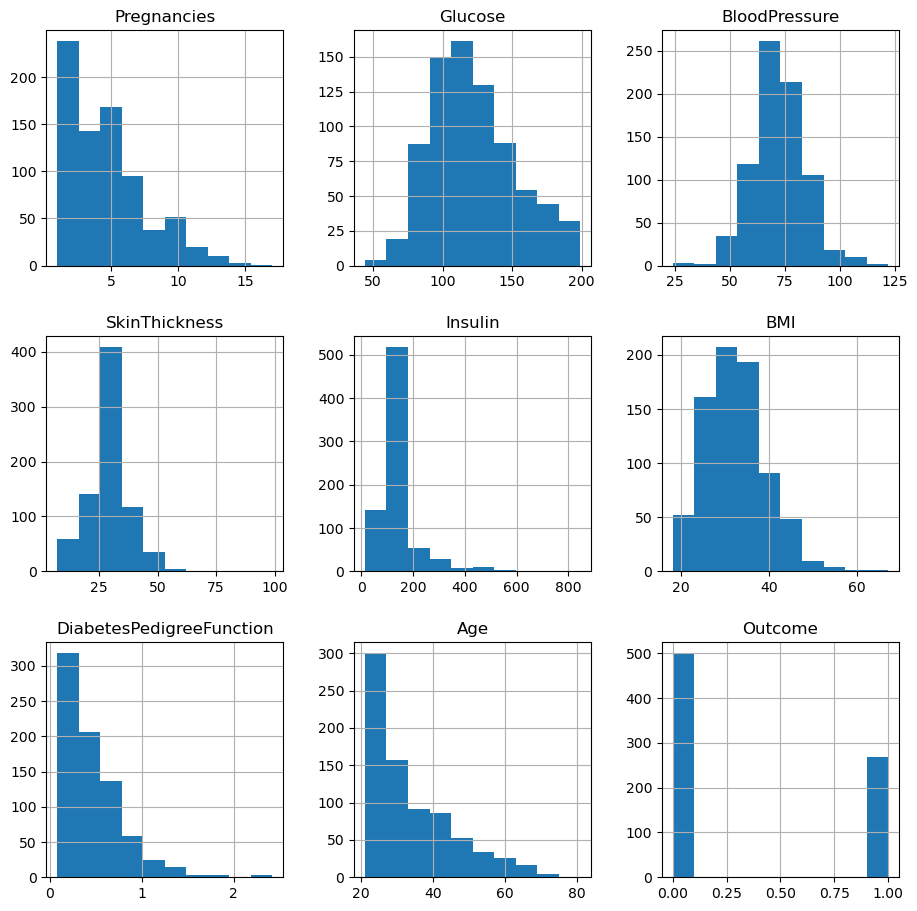

In [16]:
diabetes_data.hist(figsize=(11,11));

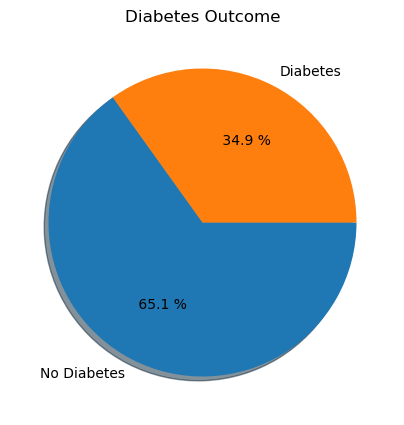

In [17]:
plt.figure(figsize=(5,5))
plt.pie(diabetes_data['Outcome'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct ='% 1.1f %%',
        counterclock = False, shadow = True)
plt.title('Diabetes Outcome')
plt.show()

Text(0.5, 1.0, 'Glucose vs Diabetes')

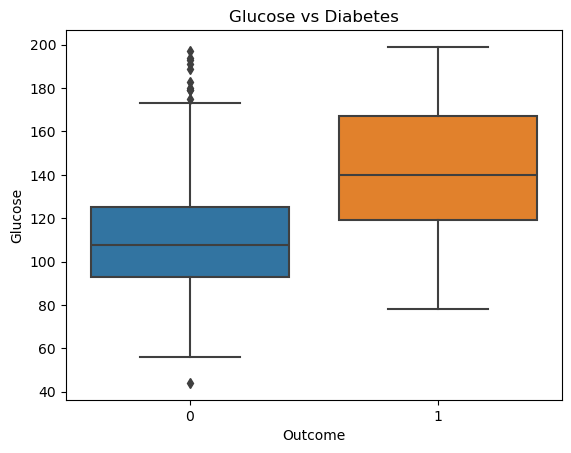

In [18]:
sb.boxplot(x='Outcome', y='Glucose', data = diabetes_data).set_title('Glucose vs Diabetes')

Text(0.5, 1.0, 'BloodPressure vs Diabetes')

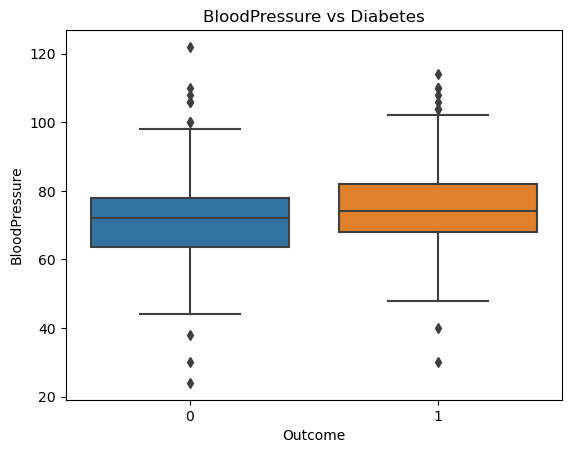

In [19]:
sb.boxplot(x='Outcome', y='BloodPressure', data=diabetes_data).set_title('BloodPressure vs Diabetes')

Text(0.5, 1.0, 'BMI vs Diabetes')

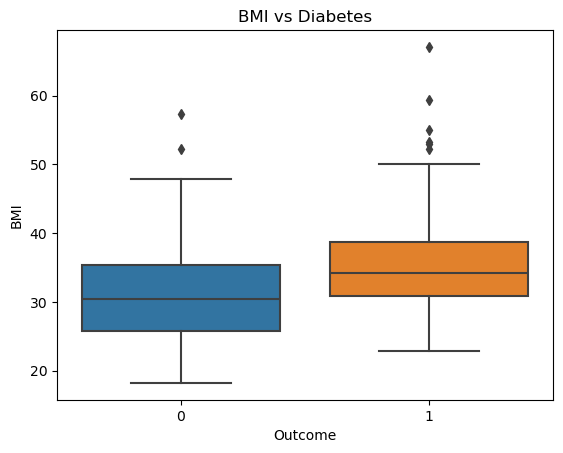

In [20]:
sb.boxplot(x='Outcome', y='BMI', data=diabetes_data).set_title('BMI vs Diabetes')

Text(0.5, 1.0, 'SkinThickness vs Diabetes')

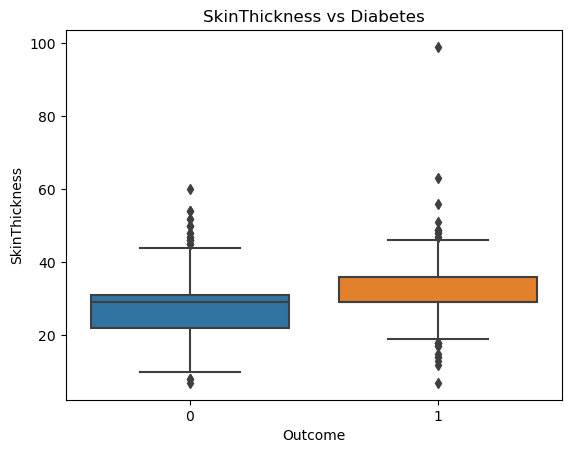

In [21]:
sb.boxplot(x='Outcome', y='SkinThickness', data=diabetes_data).set_title('SkinThickness vs Diabetes')

Text(0.5, 1.0, 'Insulin vs Diabetes')

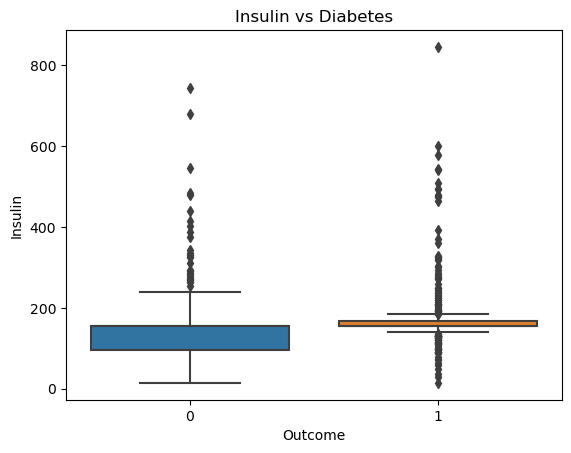

In [22]:
sb.boxplot(x='Outcome', y='Insulin', data=diabetes_data).set_title('Insulin vs Diabetes')

Text(0.5, 1.0, 'Correlation Heatmap')

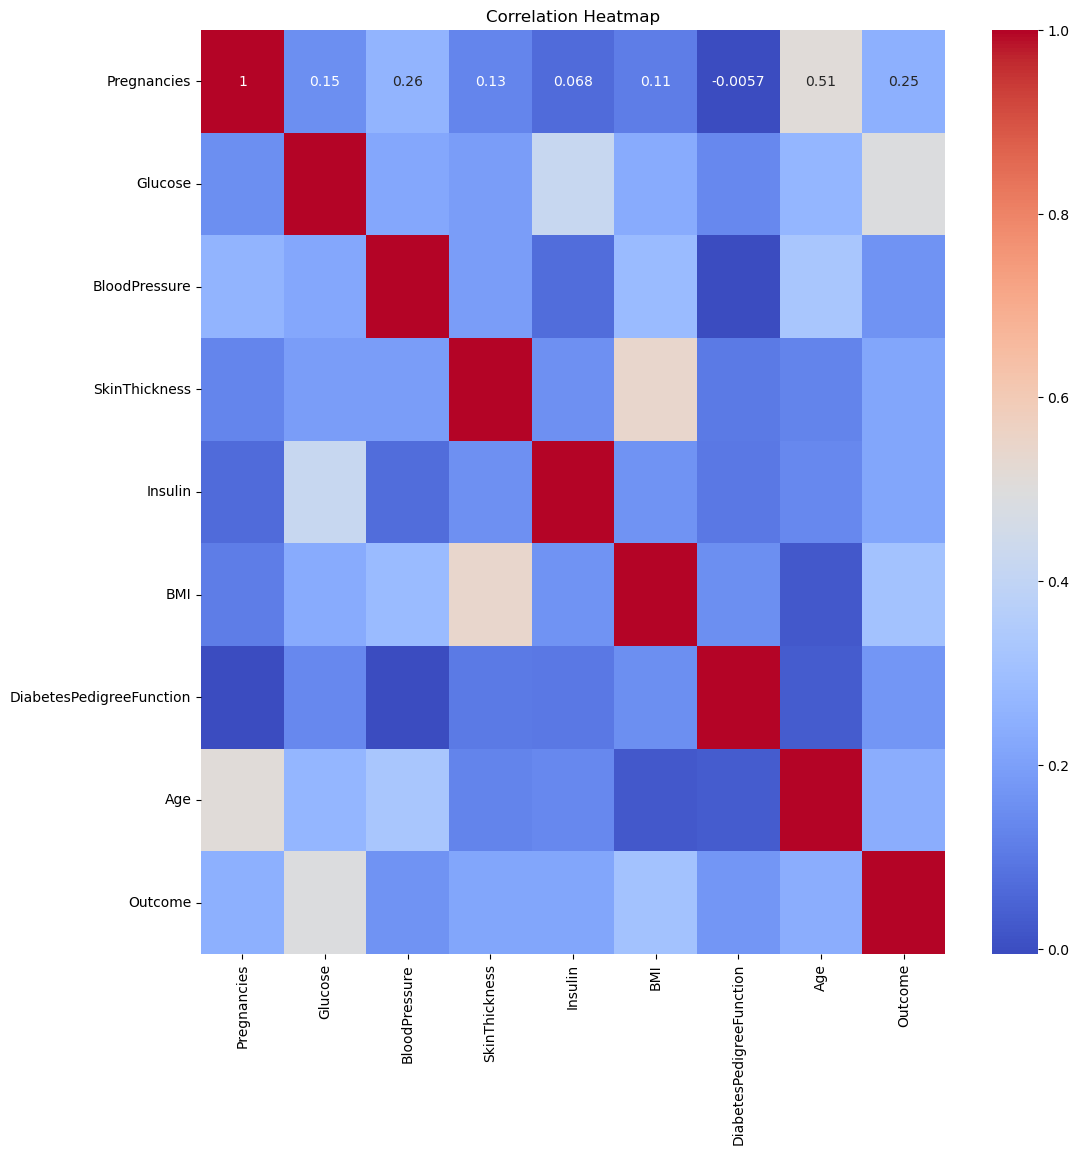

In [23]:
#correlation heatmap
plt.figure(figsize=(12,12))
sb.heatmap(diabetes_data.corr(), annot=True, cmap='coolwarm').set_title('Correlation Heatmap')

## Separating targert Feature from Others Features

In [24]:
x = diabetes_data.drop(columns = ['Outcome'],axis = 1)
y = diabetes_data['Outcome']

In [25]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [26]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Splitting dataset for Training and Testing

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, stratify = y, random_state = 2)

In [28]:
x.shape, x_train.shape, x_test.shape

((768, 8), (614, 8), (154, 8))

## Data Standardization

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(x_train)

x_train_ = scaler.transform(x_train)
x_test_ = scaler.transform(x_test)


In [31]:
x_train_

array([[ 1.47729734e-03, -1.02197491e-01, -3.23832163e-02, ...,
        -3.58635314e-02, -9.81597080e-01, -7.88523305e-01],
       [ 5.06591544e-01, -5.60206886e-01, -2.27928606e-01, ...,
        -2.65514049e-01, -1.03823795e+00,  3.18794257e-01],
       [-1.17116407e+00,  2.18784948e+00, -1.04094489e+00, ...,
        -3.65986151e-01, -2.15454767e-01,  2.19271628e+00],
       ...,
       [ 2.18434715e+00, -1.21450602e+00,  9.72779071e-02, ...,
        -3.65986151e-01, -5.07602419e-01,  1.48437709e-01],
       [-1.64510701e-01, -3.31202189e-01,  4.22484420e-01, ...,
         9.68857484e-01, -6.98392723e-01,  4.03972530e-01],
       [ 1.47729734e-03, -1.18179107e+00, -3.90531862e-01, ...,
         4.52143819e-01, -6.92430526e-01, -7.03345031e-01]])

In [32]:
x_test_

array([[-0.50006182, -0.52749193, -0.06532535, ..., -0.98317192,
        -0.78484458, -0.53298848],
       [-0.50006182, -0.29848723, -2.34177094, ..., -1.47117927,
        -0.98457818, -0.95887985],
       [ 0.17104042,  0.8138213 ,  0.42248442, ...,  0.15072751,
        -0.7520525 ,  2.70378593],
       ...,
       [-0.83561295, -0.3966321 ,  0.09727791, ..., -0.03586353,
         0.67887478, -0.53298848],
       [-0.83561295, -1.34536585, -0.06532535, ..., -0.36598615,
         0.22872891, -0.70334503],
       [ 2.8554494 , -0.52749193, -0.06532535, ...,  0.56696908,
        -0.87129644,  1.00022045]])

# Model Training

## Using Logistic Regression

In [33]:
model_1 = LogisticRegression()

In [34]:
#training the Logistic model
model_1.fit(x_train_, y_train)
#training accuracy
model_1.score(x_train_, y_train)

0.7801302931596091

In [35]:
#predicted outcomes
model_1_pred = model_1.predict(x_test_)

## Using Random Forest Classifier

In [36]:
model_2 = RandomForestClassifier(n_estimators=100,random_state=42)

In [37]:
#training the Random Forest Classifier
model_2.fit(x_train_, y_train)
#training accuracy
model_2.score(x_train_, y_train)

1.0

In [38]:
#predicted outcomes
model_2_pred = model_2.predict(x_test_)

## Using support vector machine

In [39]:
model_3 = svm.SVC(kernel = 'linear')

In [40]:
# training the support vector machine
model_3.fit(x_train_, y_train)
#training accuracy
model_3.score(x_train_, y_train)

0.7817589576547231

In [41]:
#predicted outcomes
model_3_pred = model_3.predict(x_test_)

# Model Evaluation

## Evaluating Logistic Regression Model

### Confusion matrix 

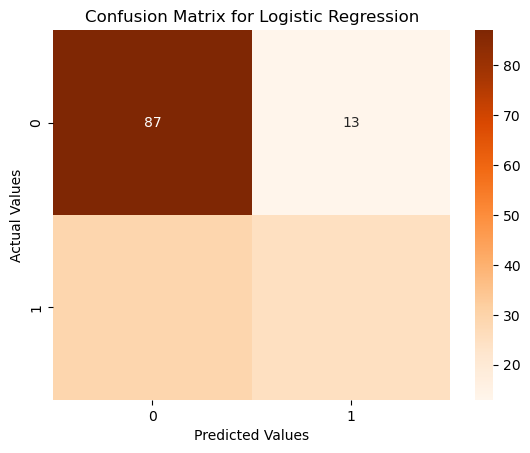

In [42]:
sb.heatmap(confusion_matrix(y_test, model_1_pred), annot=True, cmap = 'Oranges')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Distribution plot

C:\Users\enea_\AppData\Local\Temp\ipykernel_15272\2220939653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  actual = sb.distplot(y_test, color = 'r', label = 'Actual Value', hist = False)
C:\Users\enea_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\enea_\AppData\Local\Temp\ipykernel_15272\2220939653.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use eith

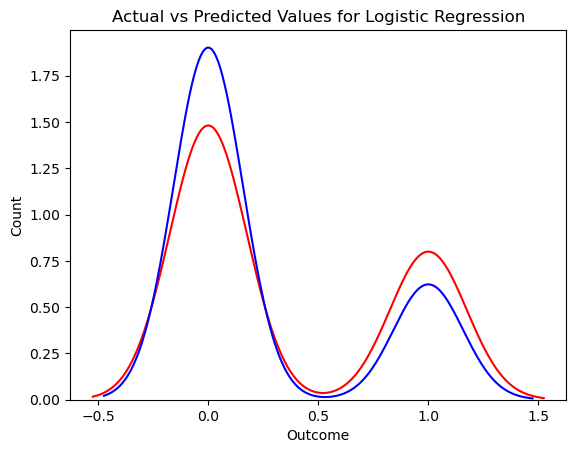

In [43]:
actual = sb.distplot(y_test, color = 'r', label = 'Actual Value', hist = False)
sb.distplot(model_1_pred, color = 'b', label = 'Predicted Value', hist = False, ax = actual)
plt.title('Actual vs Predicted Values for Logistic Regression')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

### Classification Report

In [44]:
print(classification_report(y_test, model_1_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       100
           1       0.66      0.46      0.54        54

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.67       154
weighted avg       0.72      0.73      0.71       154



In [45]:
print('Accuracy Score: ', accuracy_score(y_test, model_1_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, model_1_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, model_1_pred))
print('R2 Score: ', r2_score(y_test, model_1_pred))

Accuracy Score:  0.7272727272727273
Mean Absolute Error:  0.2727272727272727
Mean Squared Error:  0.2727272727272727
R2 Score:  -0.19777777777777805


## Evaluating Random Forest Classifier

### Confusion matrix

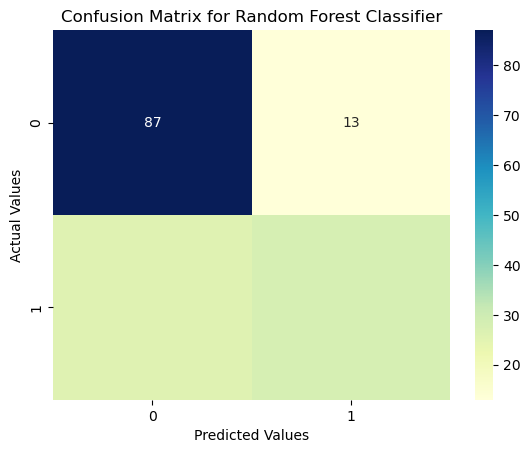

In [46]:
sb.heatmap(confusion_matrix(y_test, model_2_pred), annot=True, cmap = 'YlGnBu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

### Distribution plot

C:\Users\enea_\AppData\Local\Temp\ipykernel_15272\1102178186.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  actual = sb.distplot(y_test, color = 'r', label = 'Actual Value', hist = False)
C:\Users\enea_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\enea_\AppData\Local\Temp\ipykernel_15272\1102178186.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use eith

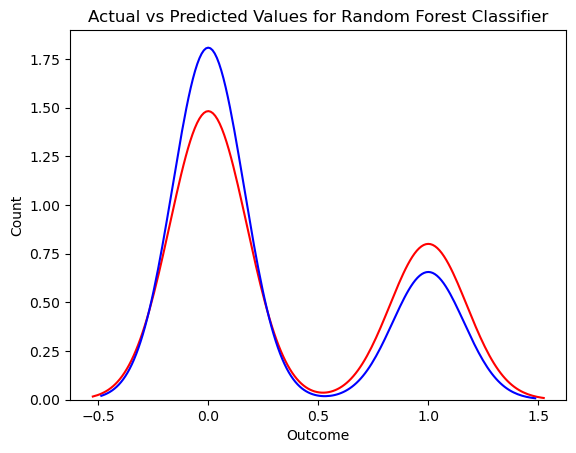

In [47]:
actual = sb.distplot(y_test, color = 'r', label = 'Actual Value', hist = False)
sb.distplot(model_2_pred, color = 'b', label = 'Predicted Value', hist = False, ax = actual)
plt.title('Actual vs Predicted Values for Random Forest Classifier')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

### Classification Report

In [48]:
print(classification_report(y_test, model_2_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       100
           1       0.68      0.52      0.59        54

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



In [49]:
print('Accuracy Score: ', accuracy_score(y_test, model_2_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, model_2_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, model_2_pred))
print('R2 Score: ', r2_score(y_test, model_2_pred))

Accuracy Score:  0.7467532467532467
Mean Absolute Error:  0.2532467532467532
Mean Squared Error:  0.2532467532467532
R2 Score:  -0.11222222222222245


## Evaluating Support Vector Machine 

### Confusion matrix

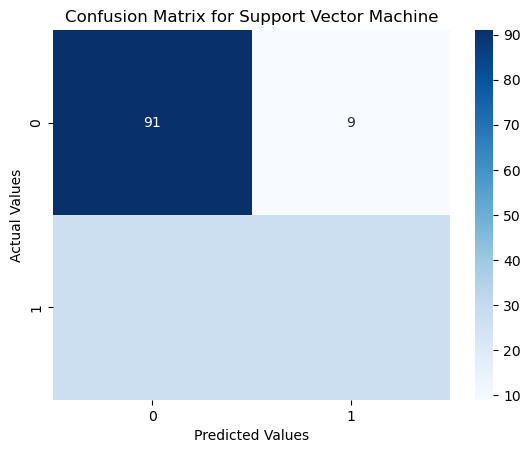

In [50]:
sb.heatmap(confusion_matrix(y_test, model_3_pred), annot=True, cmap = 'Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

### Distribution plot

C:\Users\enea_\AppData\Local\Temp\ipykernel_15272\3005999099.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  actual = sb.distplot(y_test, color = 'r', label = 'Actual Value', hist = False)
C:\Users\enea_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\enea_\AppData\Local\Temp\ipykernel_15272\3005999099.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use eith

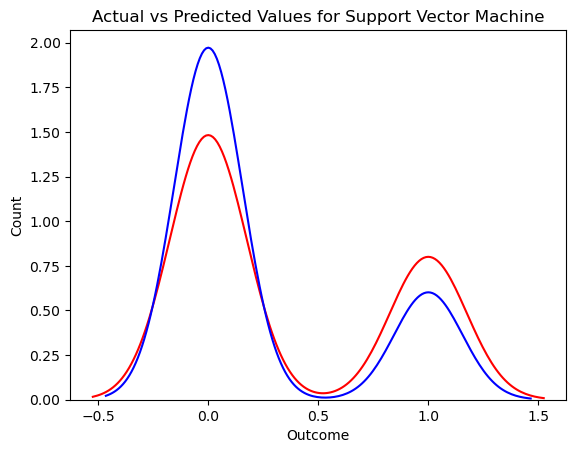

In [51]:
actual = sb.distplot(y_test, color = 'r', label = 'Actual Value', hist = False)
sb.distplot(model_3_pred, color = 'b', label = 'Predicted Value', hist = False, ax = actual)
plt.title('Actual vs Predicted Values for Support Vector Machine')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

### Classification Report

In [52]:
print(classification_report(y_test, model_3_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       100
           1       0.75      0.50      0.60        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154



In [53]:
print('Accuracy Score: ', accuracy_score(y_test, model_3_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, model_3_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, model_3_pred))
print('R2 Score: ', r2_score(y_test, model_3_pred))

Accuracy Score:  0.7662337662337663
Mean Absolute Error:  0.23376623376623376
Mean Squared Error:  0.23376623376623376
R2 Score:  -0.02666666666666684


## Comparing the models

C:\Users\enea_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0.5, 1.0, 'Comparison of different models')

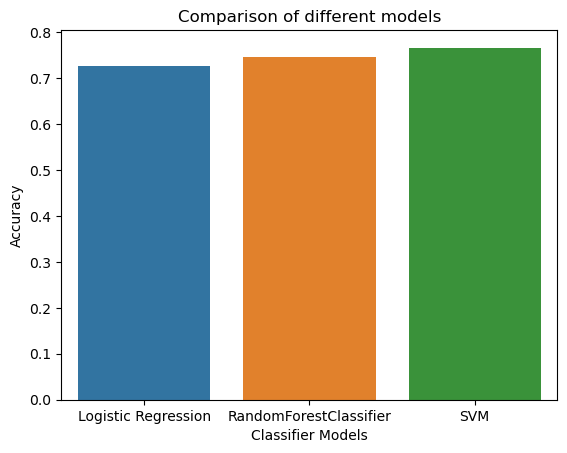

In [54]:
#comparing the accuracy of different models
sb.barplot(x = ['Logistic Regression', 'RandomForestClassifier', 'SVM'], y = [0.7272727272727273, 0.7467532467532467, 0.7662337662337663])
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of different models')

Conclusion:-
    
From the data analysis, I have concluded that the risk of diabetes depends upon the following factors:
    
1. Glucose level
2. Number of pregnancies
3. Skin Thickness
4. Insulin level
5. BMI

With in increase in Glucose level, insulin level, BMI , Skin Thickness and number of pregnancies, the risk of diabetes increases.

Coming to the classification models, Logistic Regression outperformed by Random Forest and SVM with 76% accuracy. The accuracy 
of the model can be improved by increasing the size of the dataset. The dataset used for this project was very small and 
had only 768 rows.